### Demo notebook to add a parcellation on top of the surface

1. Create our own mesh of the plane (2 faces of right angle square)
1.a. Create a square plane with 2 faces and basic coordinates
1.b. Change the coordinates to be in the middle of the brain
2. Add those faces and vertices to the brain vertices and faces
3. Adjust the coordinates of the plane to look like it cuts the brain (with an angle)
4. Add option to change position of the plane on the x axis
5. Add an option to change the plane view (axes)
5. Add an option to add more than one plane

In [1]:
# import libraries
import os, sys
from matplotlib_surface_plotting import plot_surf
import nibabel as nb
import numpy as np


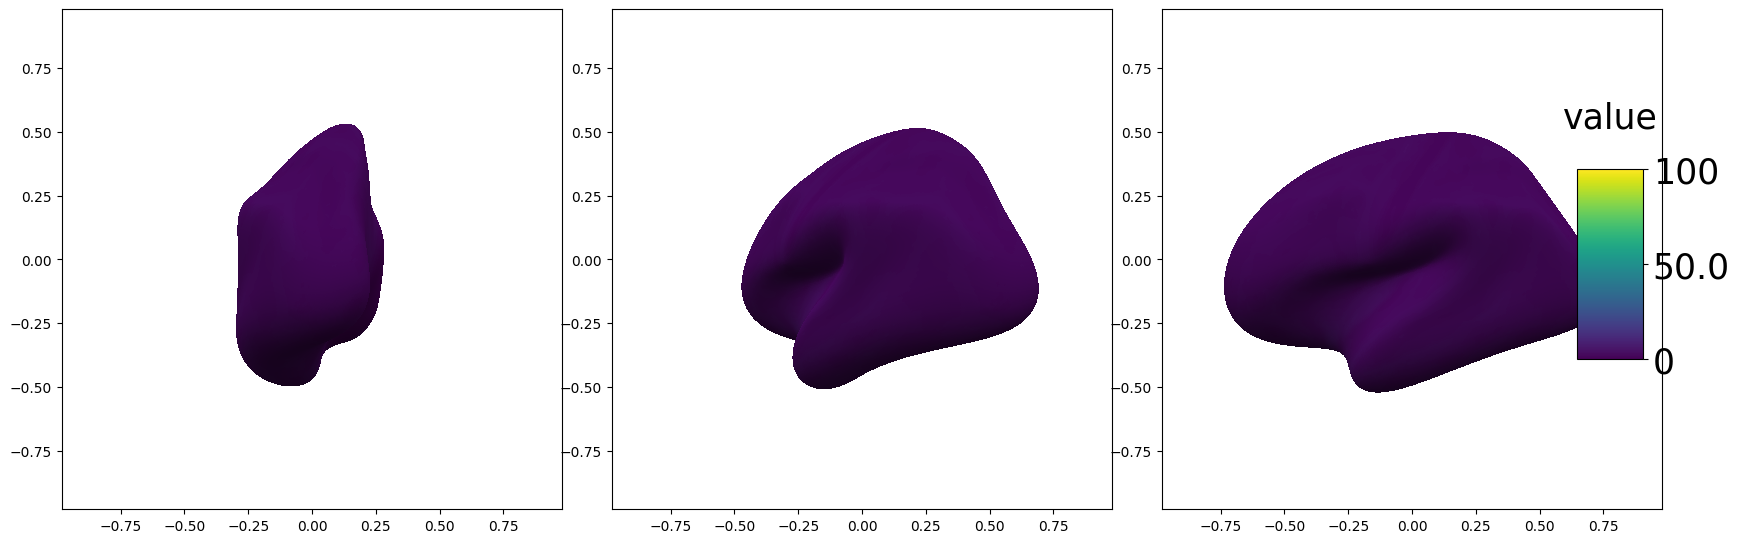

In [2]:
# get the brain vertices and faces
vertices_brain, faces_brain=nb.freesurfer.io.read_geometry('../data/lh.inflated')
overlay_brain = nb.freesurfer.io.read_morph_data('../data/lh.thickness')

plot_surf(vertices_brain, faces_brain, overlay_brain, 
          rotate=[0, 45, 90], vmin=0, vmax=100,
         )

/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:82: RuntimeWarning: invalid value encountered in divide
  intensity = (1-shading)+shading*(intensity-np.min(intensity))/((np.percentile(intensity,80)-np.min(intensity)))
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:329: RuntimeWarning: invalid value encountered in divide
  colours = (colours - colours.min())/(colours.max()-colours.min())


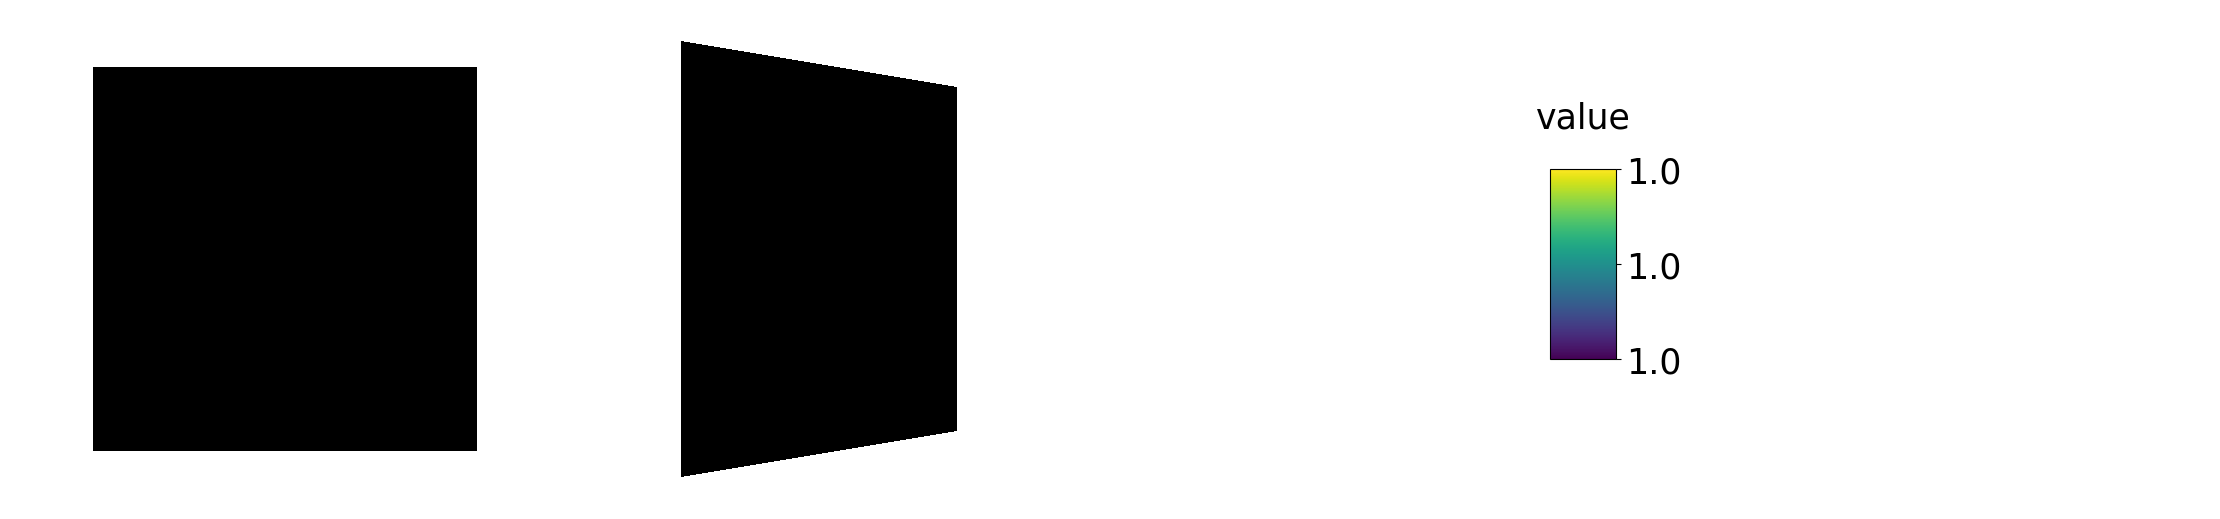

In [105]:
# create the plane vertices and faces
faces_plane = np.array([[0,1,2],[1,3,2]])
# vertices_plane = np.array([[0,0,0],[1,0,0],[1,1,0],[0,1,0]])
vertices_plane = np.array([[-1,-1,-1],[1,-1,-1],[-1,-1,1],[1,-1,1]])
overlay_plane = np.array([1,1,1,1])

plot_surf(vertices_plane, faces_plane, overlay_plane, 
          rotate=[0, 45, 90]
         )

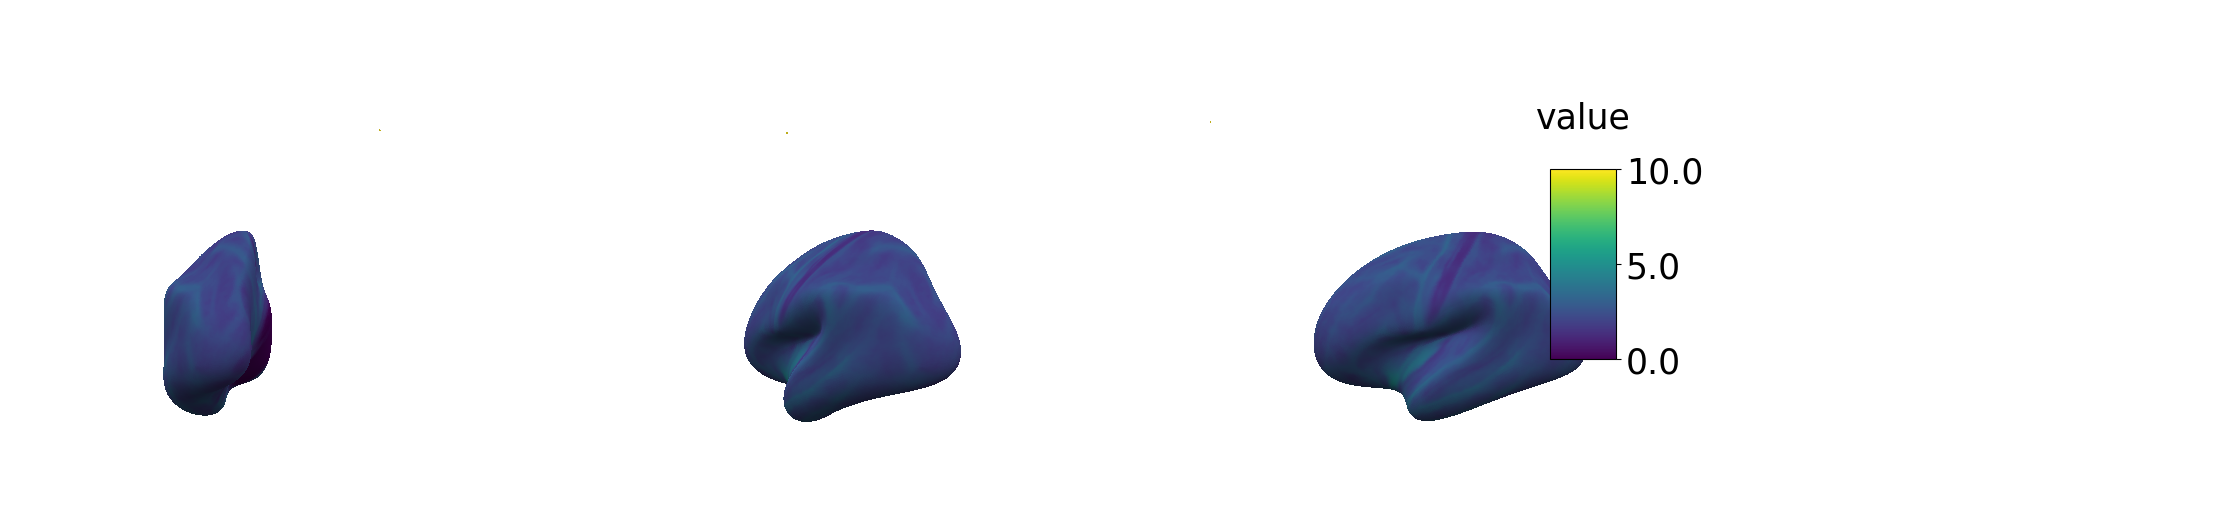

In [ ]:
# combine brain and plane vertices and faces
vertices_plane_new = vertices_plane*np.max(vertices_brain+100,axis=0)
faces_plane_new = faces_plane+len(vertices_brain)
# update plane vertices and faces to match the brain scale
vertices = np.vstack([vertices_brain, vertices_plane_new ])
faces = np.vstack([faces_brain, faces_plane_new])
overlay = np.hstack([overlay_brain, overlay_plane*10])
plot_surf(vertices, faces, overlay, 
          rotate=[0, 45, 90],
         )

In [100]:
vertices_brain.max(axis=0)

array([ 40.19042587, 105.30043793,  71.46674347])

In [49]:
vertices_plane_new.max(axis=0)

array([ -0.61127862, 201.20183682, 170.70769528])

In [50]:
vertices_brain.max(axis=0)

array([ 40.19042587, 105.30043793,  71.46674347])

In [54]:
faces_plane_new.max()

np.float64(108.3004379272461)

In [32]:
vertices_plane*np.max(vertices_brain,axis=0) + np.median(vertices_brain,axis=0)

array([[ -0.61127862,  -4.0986011 ,  -0.75904819],
       [ -0.61127862,  -4.0986011 ,  70.70769528],
       [ -0.61127862, 101.20183682,  70.70769528],
       [ -0.61127862, 101.20183682,  -0.75904819]])

In [ ]:
vertices_plane*np.max(vertices_brain)

array([[105.30043793, 105.30043793, 105.30043793],
       [105.30043793, 105.30043793, 106.30043793],
       [105.30043793, 106.30043793, 106.30043793],
       [105.30043793, 106.30043793, 105.30043793]])

In [17]:
overlay_plane

array([1, 1, 1, 1])

In [12]:
np.hstack([overlay_brain, overlay_plane])

array([2.66326499, 2.72305846, 2.52017069, ..., 1.        , 1.        ,
       1.        ], shape=(163846,))

In [ ]:
np.stack([overlay_brain, overlay_plane])

In [28]:
overlay_plane.shape

(2,)

In [29]:
faces_plane.shape

(2, 3)

In [9]:
vertices_plane.shape

(4, 3)

In [20]:
overlay.shape

(163842,)

In [7]:
vertices.shape

(163842, 3)

In [8]:
faces.shape

(327680, 3)

In [30]:
faces_plane

array([[0, 1, 3],
       [1, 2, 3]], dtype='>i4')

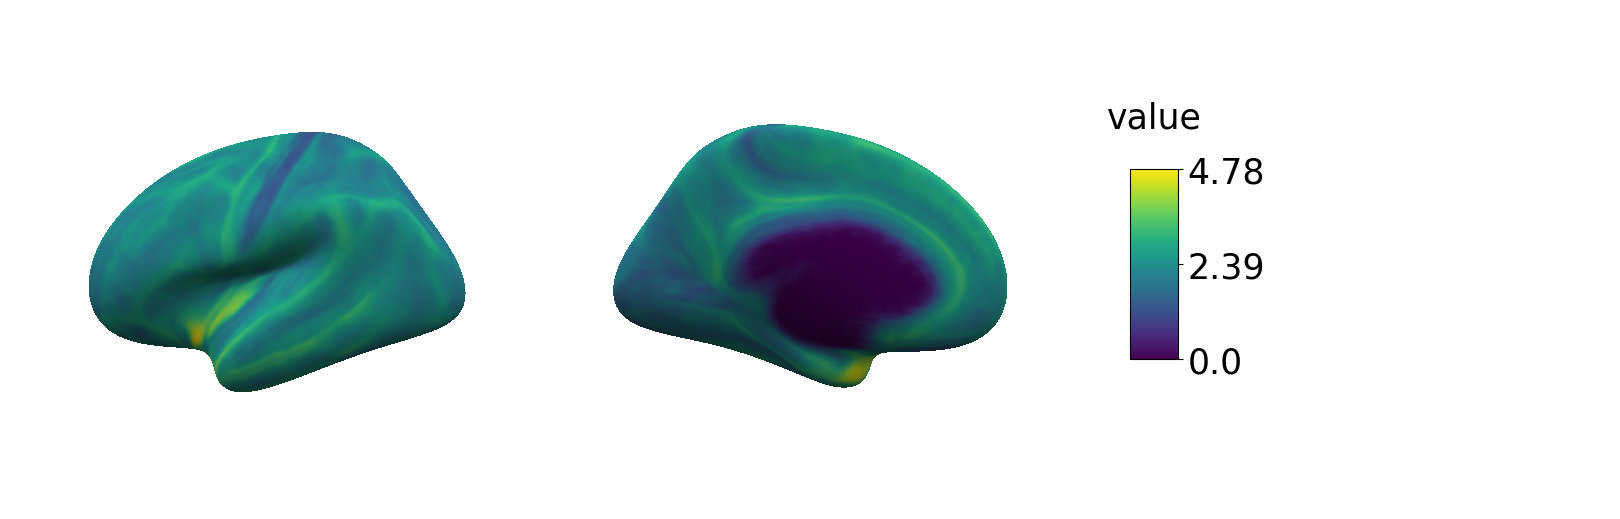

In [34]:
plot_surf(vertices, faces, overlay)

In [36]:
vertices_plane

array([[0, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

In [60]:
vertices.max()

np.float64(105.3004379272461)